## Final Project Submission

Please fill out:
* Student name: Oliver Zimmer
* Student pace: self paced
* Scheduled project review date/time: 3rd September 2021
* Instructor name: Jeff Herman
* Blog post URL:


### Project Overview

This is the end of **Project 1** challenge of the Flatiron School Online Data Science course. The task at hand is an **exploratory data analysis (EDA)** for a business stakeholder.

The business stakeholder for this project is **Microsoft**, whose aim is to par up with the Netflix, amazon prime, Apple+ and all the other streaming services to participate in **creating original video content**.

The task is to explore what types of films are currently most successful at the box office. The findings must then be translated into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Data base

Data from various movie datasets has been provided:

 - [Box Office Mojo](https://www.boxofficemojo.com/)
 - [IMDB](https://www.imdb.com/)
 - [Rotten Tomatoes](https://www.rottentomatoes.com/)
 - [The MovieDB](https://www.themoviedb.org/)
 - [The Numbers](https://www.the-numbers.com/)


### Importin the necessary Python libraries and modules

In a first step, I will import the **Pandas** and **Seaborn** libraries, as I will most definitely work with **DataFrames** and **visualizations**. I choose Seaborn over **Matplotlib** as I aim for enhanced aesthetics in my visuals, which are likely to be shared externally. However, I still have to import Matplotlib, which provides the framework for Seaborn. This Jupyter Notebook is not intended for interactive visualizations, which is why I will rely on the command *%matplotlib inline* rather than *%matplotlib qt*.

In [1]:
# Import the necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading in the data

Having Pandas imported and knowing that much of the underlying data is in **CSV-Format** I can import the data with the *pd.read_csv* command and take a first look at the data to get a feel for the information.

In [2]:
# load the CSV-data via Pandas read_csv module
df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
display(df_gross.head()) # display provides for previous commands being shown in Jupyter Notebook 
                         #(otherwise only the last entry will be shown)
df_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
display(df_ratings.head())
df_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
display(df_basics.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Using a more 'Pythonian' way of

As there are many CSV files and this process of singular loading seems arduous, I revert to the [Glob module](https://docs.python.org/3/library/glob.html) to **find files recursively** and add all of them to a **list**. I can then display this list and thus all files at once. 

In [3]:
from glob import glob
csv_data = glob("./zippedData/*.csv.gz")
csv_data

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [4]:
csv_dictionary = {} # Create an empty dictionary to hold the individual CSV-files
for item in csv_data:
    name = item.split('./zippedData\\')[-1].replace(".csv.gz", "").replace(".", "_") # Clean the filename for recursive access
    df = pd.read_csv(item) # Create a DataFrame for each file
    csv_dictionary[name] = df # Add each DataFrame to the dictionary

In [5]:
# Preview the first five lines of each newly created DataFrame
for title, df in csv_dictionary.items():
    print(title)
    display(df.head())
    print("\n")

bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010




imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"




imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0




imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"




imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943




imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"




imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186




tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Choice of Data

Apart from these CSV-files, there is even more data available. But since more is not necessarily always better, and taking a quick glance at the above, I have decided to start the EDA with the following datasets:

 - While *bom_movie_gross* provides domestic and foreign gross figures, the data does not provide the underlying budgets. Thus, there is no way of actually retrieving a **return on investment** for each movie (i.e. comparing the "bang-for-buck"). As I also do not consider the film studio to be a relevant factor for Microsoft's original movies, I won't be relying on this dataset
 - The *imdb title* basics provide the runtime and genre of each movie, both of which might prove useful in gauging a movie's box office success
 - While *tmdb_movies* provides information regarding popularity votes, these ratings might not be the most objective measure of a movie's financial success. Nevertheless I will keep this file in consideration for prospective analyses
 - The most accessible file from the start is *tn_movie_budget*: Providing **domestic and worldwide gross figures** along with the **production budget**, this file will form the perfect base for a **return on investment** analysis, allowing the Microsoft stakeholders to quickly grasp potential financial return as a starting point, before going into further details such as runtime and genres

### Exploring and Cleaning the data
In a first step, I will explore each individual dataset and apply any cleanup necessary to proceed with viable analyses.

### ''Ratings'' DataFrame

Let's quickly load and examine the ratings DataFrame.

In [6]:
ratings = csv_dictionary['imdb_title_ratings']
display(ratings.head())
display(ratings.info())

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

In [7]:
ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

All columns contain the correct data types and there are no missing values - The DataFrame is good to go, without any further work!

### "Runtime & Genre" DataFrame

In [8]:
runtime_genre = csv_dictionary['imdb_title_basics']
display(runtime_genre.head())
display(runtime_genre.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

This is a rather large dataset with 146,144 rows across six columns, all of which appear to be in the correct format. Yet at first glance there are missing values in the data set, as indicated by the **nan** (not a number) value in the *runtime_minutes* column.

The question is: **How many missing values are in the dataset?**

In [9]:
# count total missing values per column
runtime_genre.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
runtime_genre.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [11]:
# % of missing values for title, runtime and genres
print('Percentage of missing values in the title column: ',(runtime_genre['original_title'].isna().sum()/len(runtime_genre)*100).round(2),'%')
print('Percentage of missing values in the runtime column: ',(runtime_genre['runtime_minutes'].isna().sum()/len(runtime_genre)*100).round(2),'%')
print('Percentag of missing values in the genre column: ',(runtime_genre['genres'].isna().sum()/len(runtime_genre)*100).round(2),'%')

Percentage of missing values in the title column:  0.01 %
Percentage of missing values in the runtime column:  21.72 %
Percentag of missing values in the genre column:  3.7 %


While the percentage of missing values in both the **title** as well as the **genre** columns seems negligible, more than one fifth of the entire data set is missing in the **runtime_minutes** column. As such, these values must not be dropped from the DataFrame, but rather adequately substituted. Possible methods of choice in this regard are the dataset's **mean, median or mode**. Let's check the value of each of those:

In [12]:
# Check the mode of the runtime_minutes column
runtime_genre['runtime_minutes'].mode().round(2)

0    90.0
dtype: float64

In [13]:
# Check the mean of the runtime_minutes column
runtime_genre['runtime_minutes'].mean().round(2)

86.19

In [14]:
# Check the median of the runtime_minutes column
runtime_genre['runtime_minutes'].median().round(2)

87.0

In [15]:
runtime_genre.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


**90 minutes** have become somewhat of a benchmark for movie lengths (check out this [article from WhatCulture](https://whatculture.com/film/why-were-90-minute-length-films-a-touchstone-in-cinema-for-so-long) for some insights). The **mode** for movie lengths of this dataset, i.e. the most frequent occurence, confirms this, which is why I will revert to the mode for substitution.

My next choice would have been the **median** rather than the **mean**, as it is less affected by outliers (e.g. the very first movie in the DataFrame with its whopping close-to-three-hours runtime is likely to skew the *most common runtime*).

In [16]:
# Substituting missing runtime values with the median
# Making sure to add [0], otherwise a single DataFrame rather than a Series is assumed by Pandas
runtime_genre['runtime_minutes'] = runtime_genre['runtime_minutes'].fillna(runtime_genre['runtime_minutes'].mode()[0])

For both the title and the genre column, the missing values can be dropped without losing to much information.

In [17]:
runtime_genre = runtime_genre.dropna()
runtime_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [18]:
# Re-check for missing values
runtime_genre.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Though there are no more missing values in the dataset, there still might be **duplicate values** lurking around.

In [19]:
runtime_genre.duplicated().any()

False

For further data cleanup, we can drop the superfluous **original_title** column.

In [20]:
# Drop column "original_title"
runtime_genre = runtime_genre.drop('original_title', axis = 1)
runtime_genre.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Let's also change the kind of clunky column header *primary_title* into *title*.

In [21]:
runtime_genre.rename(columns = {'primary_title':'title'}, inplace=True)
runtime_genre.head()

,tconst,title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


**Descriptive statistics** provide a feel for the data and might hint at anomalies in the data sets.

In [22]:
runtime_genre.describe()

,start_year,runtime_minutes
count,140734.000000,140734.000000
mean,2014.613945,87.018681
std,2.735566,149.941643
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,90.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


The **max year value of 2115** seems to have jumped right out of a science-fiction movie! Let's see which one:

In [23]:
runtime_genre[runtime_genre['start_year'] == runtime_genre['start_year'].max()]

,tconst,title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,2115,90.0,Drama


As a matter of fact, this is no mistake but very clever and intriguing marketing! [**100 Years**](https://en.wikipedia.org/wiki/100_Years_(film)) will truly be released in 2115! 

There are equally interesting facts about the runtime:

In [24]:
print("The longest movie(s): ")
runtime_genre[runtime_genre['runtime_minutes'] == runtime_genre['runtime_minutes'].max()]

The longest movie(s): 


,tconst,title,start_year,runtime_minutes,genres
132389,tt8273150,Logistics,2012,51420.0,Documentary


In [25]:
print("The shortest movie(s): ")
runtime_genre[runtime_genre['runtime_minutes'] == runtime_genre['runtime_minutes'].min()]

The shortest movie(s): 


,tconst,title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,2019,1.0,Animation
3298,tt10326116,Happy New Year,2019,1.0,Animation
22903,tt1935926,Tierra,2010,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,2013,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,2012,1.0,"Adventure,Documentary"
60809,tt3515578,November,2014,1.0,"Documentary,History"
72190,tt4122866,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
93214,tt5430316,Great Valley Nature Center Documentary,2015,1.0,Documentary
95787,tt5589268,A Serendipitous Exploration,2016,1.0,Documentary
98755,tt5773518,Isa One Minute Portrait,2016,1.0,Documentary


At the moment, there are two more aspects I am going to change:
 - Create **categories for the runtime**: This will alleviate analytics by clustering runtime into more manageable chunks
 - **Stack the genre**: Currently, one movie can be classified into mutiple genres. In order to individually analyze genres and their profit potential, I will split those.

### Runtime Categories

I will define a function to create four categories of runtimes and apply it to the runtime_genre DataFrame.

In [26]:
def runtime_category(runtime):
    if runtime < 90.00:
        return "< 90min"
    elif 90.00 <= runtime <= 120.00:
        return "90min - 120min"
    elif 120.00 < runtime <= 150.00:
        return "120min - 150min"
    else:
        return ">150min"

runtime_genre['runtime'] = runtime_genre['runtime_minutes'].apply(runtime_category)
runtime_genre.head()

,tconst,title,start_year,runtime_minutes,genres,runtime
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",>150min
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",90min - 120min
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,120min - 150min
3,tt0069204,Sabse Bada Sukh,2018,90.0,"Comedy,Drama",90min - 120min
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",< 90min


### Stacking the Genres

Some movies are entitled to be categorized into *more than one genre*. As a matter of fact, there are up to three different genres for a movie. In light of prospective profitability analyses per genre, this can be taken care of by **stacking the various genres**, which are **delimited by a comma**.

In [27]:
runtime_genre_stacked = runtime_genre.copy()
runtime_genre_stacked = runtime_genre.set_index('title').genres.str.split(',', expand=True).stack().reset_index('title')
runtime_genre_stacked.columns = ['title','genre']
runtime_genre_stacked

,title,genre
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
0,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama
...,...,...
2,The Secret of China,War
0,Kuambil Lagi Hatiku,Drama
0,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
0,Dankyavar Danka,Comedy


Perfect! Now add it back to the original to maintain the remaining information and discard the original 'genre' column, as it is no longer needed. Since this is a rather drastic measure to be taken, I will actually **create a copy of the DataFrame to be stacked**, while leaving the original untouched.

This dataset is analyzed and cleansed. As I still might have to make use of the **'tconst'** column as a *key*, I will hold on to it for now. Let's focus on the next dataset: **Budgets**

### "Budgets" DataFrame

In [28]:
budgets = csv_dictionary['tn_movie_budgets']
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


At first glance, the id column does not provide additional information and can subsequently be dropped (this is no column useful to merge on, such as the "tconst" column in the other DataFrame).

In [29]:
# Remove the 'id' column
budgets = budgets.drop('id', axis = 1) # axis = 1 for columns (0 for rows)
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Release year

Since detailed release dates will potentially result in thousands of different data points for prospective visualizations (where time will be indicated on the x-axis), the release year itself will suffice for later visualizations. There is also no need to convert the year to a datetime datatype as it is solely used for time indication in the visualization.

In this step I will also restrict the potential release years by only allowing movies that were released **within the last three decades**, ultimately aiming for a balance of a broad scope covering enough changes in taste, while keeping close to today's trends and still dealing with a manageable and sufficient amount of data.

In [30]:
budgets['release_year'] = budgets['release_date'].apply(lambda x: int(x[-4:]))
budgets = budgets.query('release_year >= 1990')
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5210 non-null   object
 1   movie              5210 non-null   object
 2   production_budget  5210 non-null   object
 3   domestic_gross     5210 non-null   object
 4   worldwide_gross    5210 non-null   object
 5   release_year       5210 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 284.9+ KB


### Budget data cleanup

The *.info()* function shows that the data type of the production budget, domestic and worldwide gross is an object (i.e. a **string**, rather than a number (float or integer). Therefore, I first have to convert these to numbers, while also removing the **$** sign.

I will do so using a function, for there may be further such instances in other data files.

In [31]:
budgets['production_budget'] = budgets['production_budget'].str.replace("$","").str.replace(",","").astype('float')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace("$","").str.replace(",","").astype('float')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","").str.replace(",","").astype('float')
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [32]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5210 non-null   object 
 1   movie              5210 non-null   object 
 2   production_budget  5210 non-null   float64
 3   domestic_gross     5210 non-null   float64
 4   worldwide_gross    5210 non-null   float64
 5   release_year       5210 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 284.9+ KB


The data types have been corrected, the numbers look fine, save for the production budget, which is apparently too large to be properly displayed. To alleviate this, I will adjust the Pandas format.

In [33]:
pd.options.display.float_format = '{:,.2f}'.format
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017


Using descriptive statistics allows to get a feel for the data and check for basic irregularities.

In [34]:
budgets[['production_budget','domestic_gross','worldwide_gross']].describe()

,production_budget,domestic_gross,worldwide_gross
count,"5,210.00","5,210.00","5,210.00"
mean,"33,898,459.35","42,349,472.63","95,525,750.92"
std,"43,269,057.45","69,704,380.29","180,906,979.72"
min,"1,100.00",0.00,0.00
25%,"5,600,000.00","1,032,703.50","3,544,487.00"
50%,"20,000,000.00","17,013,180.00","29,562,089.00"
75%,"45,000,000.00","53,301,948.50","102,434,901.75"
max,"425,000,000.00","936,662,225.00","2,776,345,279.00"


The count of 5,210 rows may be skewed by duplicate values. However, checking for duplicate values shows that there are actually 5,210 unique rows.

In [35]:
budgets.duplicated().any()

False

Nevertheless, not all of these values might actually be worthwile for future investigations, as there are apparently zero values for domestic and worldwide gross, indicated by the minimum figures (this might in fact be due to the movie not being released at the time of the data being compiled)

In [36]:
zero_gross = budgets[(budgets.domestic_gross == 0) & (budgets.worldwide_gross == 0)]
zero_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,"Dec 31, 2020",Moonfall,"150,000,000.00",0.00,0.00,2020
479,"Dec 13, 2017",Bright,"90,000,000.00",0.00,0.00,2017
480,"Dec 31, 2019",Army of the Dead,"90,000,000.00",0.00,0.00,2019
535,"Feb 21, 2020",Call of the Wild,"82,000,000.00",0.00,0.00,2020
670,"Aug 30, 2019",PLAYMOBIL,"75,000,000.00",0.00,0.00,2019
...,...,...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,"15,000.00",0.00,0.00,2014
5764,"Dec 31, 2007",Tin Can Man,"12,000.00",0.00,0.00,2007
5771,"May 19, 2015",Family Motocross,"10,000.00",0.00,0.00,2015
5777,"Dec 31, 2018",Red 11,"7,000.00",0.00,0.00,2018


In [37]:
len(zero_gross)/len(budgets)

0.06602687140115163

Since there are only 344 zero rows in comparison to the overall 5,210 rows of the entire data set (i.e. merely 6.6%) I choose to clean these from the budgets DataFrame.

In [38]:
budgets = budgets[(budgets.domestic_gross != 0) & (budgets.worldwide_gross != 0)]
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       4686 non-null   object 
 1   movie              4686 non-null   object 
 2   production_budget  4686 non-null   float64
 3   domestic_gross     4686 non-null   float64
 4   worldwide_gross    4686 non-null   float64
 5   release_year       4686 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 256.3+ KB


In [39]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017


Let's rename the **movie** column into **title** to align it with the first DataFrame and have a possible key to merge both DataFrames together.

In [40]:
budgets.rename(columns={'movie':'title'}, inplace=True)
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017


Next, to actually measure profitability of these movies, I will put the worldwide gross amounts in relation to the production budget, thus creating a **Return on Investment** *(i.e. ROI)*. This key performance indicator will come in handy in quickly accessing a movie's profitability. A bigger production budget might not necessarily imply a greater profitability and vice versa, the ROI on the other hand allows for relative comparison among differents sized budgets and gross levels.

In [41]:
budgets['ROI'] = budgets.apply(lambda x: x['worldwide_gross'] / x['production_budget'], axis=1).astype('float')
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15


Alternatively, I could have opted for the profit margin via **(Worldwide Gross – Production Budget ) / Worldwide Gross**. This way, the interpretation would have been the percentage of invest that has been turned into profit.

As was the case for the **runtime categories** in the runtime_genre DataFrame, I will create categories for the ROI to ease analysis and enhance later visualizations.

In [42]:
def ROI_category(ROI):
    if ROI < 1.00:
        return "box-office bomb"
    elif 1.00 <= ROI <= 2.00:
        return "1.00x - 2.00x"
    elif 2.00 < ROI <= 3.00:
        return "2.00x - 3.00x"
    elif 3.00 < ROI <= 4.00:
        return "3.00x - 4.00x"
    elif 4.00 < ROI <= 5.00:
        return "4.00x - 5.00x"
    else:
        return "blockbuster"

In [43]:
budgets['ROI_category'] = budgets['ROI'].apply(ROI_category)
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53,blockbuster
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55,2.00x - 3.00x
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43,box-office bomb
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24,4.00x - 5.00x
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15,4.00x - 5.00x


In the same way, I will create classes for production budgets.

In [44]:
budgets.describe()

,production_budget,domestic_gross,worldwide_gross,release_year,ROI
count,"4,686.00","4,686.00","4,686.00","4,686.00","4,686.00"
mean,"36,746,116.51","47,085,094.41","105,867,347.45","2,006.64",3.99
std,"44,452,141.86","71,965,989.29","187,915,298.68",6.91,15.02
min,"1,100.00",388.00,401.00,"1,990.00",0.00
25%,"8,000,000.00","3,755,124.00","8,133,698.00","2,001.00",0.71
50%,"20,600,000.00","22,288,458.00","38,099,955.00","2,007.00",1.83
75%,"50,000,000.00","58,820,676.50","117,782,405.25","2,012.00",3.71
max,"425,000,000.00","936,662,225.00","2,776,345,279.00","2,019.00",431.52


In [45]:
def budget_category(production_budget):
    if production_budget < 25000000:
        return "< 25m USD"
    elif 25000000 <= production_budget <= 50000000:
        return "25-50m USD"
    elif 50000000 <= production_budget <= 100000000:
        return "50-100m USD"
    elif 100000000 < production_budget <= 200000000:
        return "100-200m USD"
    else:
        return "> 200m USD"

In [46]:
budgets['budget_category'] = budgets['production_budget'].apply(budget_category)
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53,blockbuster,> 200m USD
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55,2.00x - 3.00x,> 200m USD
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43,box-office bomb,> 200m USD
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24,4.00x - 5.00x,> 200m USD
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15,4.00x - 5.00x,> 200m USD


In [47]:
budget_percentage = budgets.budget_category.value_counts(normalize=True)
budget_percentage

< 25m USD      0.53
25-50m USD     0.24
50-100m USD    0.15
100-200m USD   0.07
> 200m USD     0.01
Name: budget_category, dtype: float64

A quick look at the overall distribution of ROI categories is best revealed using a visual, rather than a table of mere numbers.

In [48]:
budgets['ROI_category'].value_counts().astype('float')/budgets['ROI_category']
ROI_percentage = budgets.ROI_category.value_counts(normalize=True)
ROI_percentage

box-office bomb   0.33
1.00x - 2.00x     0.20
blockbuster       0.17
2.00x - 3.00x     0.15
3.00x - 4.00x     0.10
4.00x - 5.00x     0.06
Name: ROI_category, dtype: float64

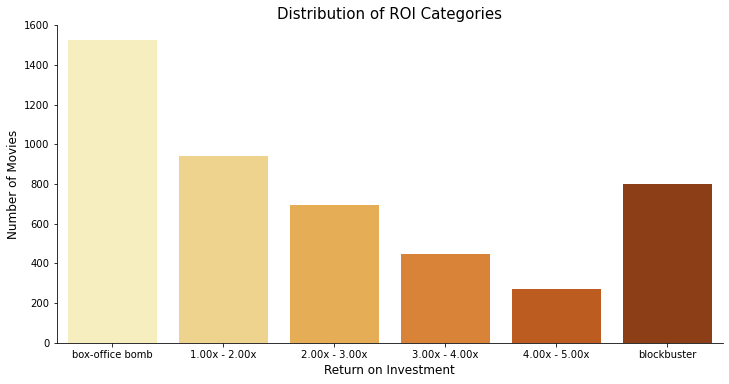

In [49]:
sns.catplot(x = 'ROI_category', kind = 'count', palette = 'YlOrBr', 
            data = budgets, aspect = 2, 
            order = ['box-office bomb','1.00x - 2.00x','2.00x - 3.00x','3.00x - 4.00x','4.00x - 5.00x','blockbuster'])
plt.ylabel('Number of Movies', fontsize = 12)
plt.xlabel('Return on Investment', fontsize = 12)
plt.title('Distribution of ROI Categories', fontsize = 15)
plt.show()

As can be seen, the vast majority of movies has actually been a *box-office bomb* by our means of definition (i.e. the production budget being greater than the worldwide gross). Let's continue our analysis with the intention of helping Microsoft not to follow this trend, but rather create the most profitable movies!

The budget DataFrame is ready to help us do just that, now it's time to use both our DataFrames in this regard.

## Data Analytics

Before we continue, let's briefly recapitulate our actions so far:
 - We have analyzed and cleaned all DataFrames we view as most beneficial in solving the task at hand
 - In the *runtime_genre* DataFrame we have introduced runtime categories and created individual genre categories for each movie
 - In the *budgets* DataFrame we have determined production budget categories, calculated the key performance indicator **ROI** and allocated it to categories

In order to provide Microsoft's stakeholders with sufficient information to take reasonable decisions in their new movie venture, I will focus on **profitability** in the four following categories:

 1. Production Budget
 2. Genre
 3. Runtime
 4. Release
 5. Rating

### Overview of DataFrames:

In [50]:
print('\n','runtime_genre original')
display(runtime_genre.head())
print('\n', 'runtime_genre stacked')
display(runtime_genre_stacked.head())
print('\n','ratings')
display(ratings.head())
print('\n','budgets')
budgets.head()


 runtime_genre original


,tconst,title,start_year,runtime_minutes,genres,runtime
0,tt0063540,Sunghursh,2013,175.00,"Action,Crime,Drama",>150min
1,tt0066787,One Day Before the Rainy Season,2019,114.00,"Biography,Drama",90min - 120min
2,tt0069049,The Other Side of the Wind,2018,122.00,Drama,120min - 150min
3,tt0069204,Sabse Bada Sukh,2018,90.00,"Comedy,Drama",90min - 120min
4,tt0100275,The Wandering Soap Opera,2017,80.00,"Comedy,Drama,Fantasy",< 90min



 runtime_genre stacked


,title,genre
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
0,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama



 ratings


,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21



 budgets


,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53,blockbuster,> 200m USD
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55,2.00x - 3.00x,> 200m USD
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43,box-office bomb,> 200m USD
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24,4.00x - 5.00x,> 200m USD
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15,4.00x - 5.00x,> 200m USD


### Analysis of Profitability by Production Budget

The sheer **size of a production budget** by itself might not necessarily be an end-all means for a movie's success. However, for the large number of movies across several years it does provide a useful indication.

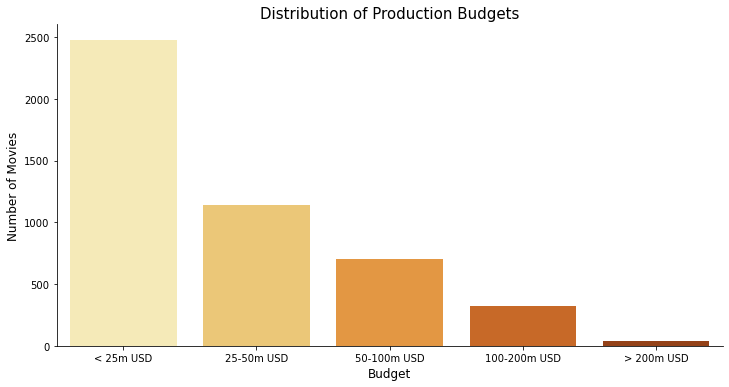

In [51]:
sns.catplot(x = 'budget_category', kind = 'count', palette = 'YlOrBr', 
            data = budgets, aspect = 2, order = ['< 25m USD','25-50m USD','50-100m USD','100-200m USD','> 200m USD'])
plt.ylabel('Number of Movies', fontsize = 12)
plt.xlabel('Budget', fontsize = 12)
plt.title('Distribution of Production Budgets', fontsize = 15)
plt.show()

The larger the production budget, the less movie's have been released, or worded differently: The majority of movies have been produced on a smaller budget. Though considering the scarcity of money as the ultimate means by which risk of a movie venture might be measured (it is easier to convince producers to risk 25 million dollars while still having a chance at a box-office hit instead of investing a whopping 10 times as much or more), the following plot provides quite the opposing picutre:

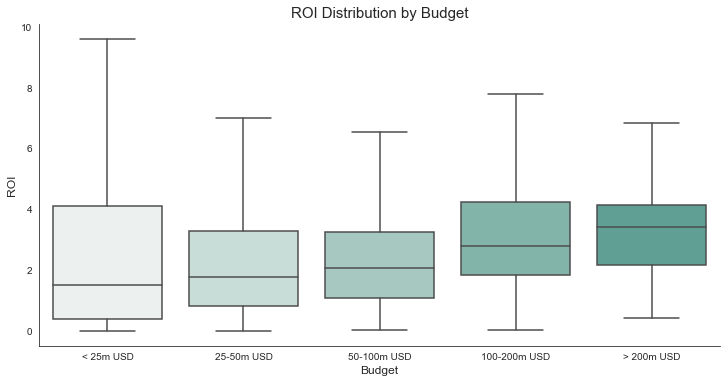

In [52]:
sns.set_style("white")
sns.catplot(x = 'budget_category', y = 'ROI', kind = 'box', aspect = 2, 
            order = ['< 25m USD','25-50m USD','50-100m USD','100-200m USD','> 200m USD'], 
            palette="light:#5A9", data = budgets, showfliers = False,
            )
plt.title('ROI Distribution by Budget', fontsize=15)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.show()

In [53]:
budget_medians = budgets.groupby('budget_category').median()
budget_medians

,production_budget,domestic_gross,worldwide_gross,release_year,ROI
budget_category,,,,,
100-200m USD,"145,000,000.00","139,507,806.00","397,501,348.00",2011,2.79
25-50m USD,"35,000,000.00","35,608,245.00","61,492,104.00",2006,1.77
50-100m USD,"70,000,000.00","64,721,020.50","146,516,137.00",2005,2.06
< 25m USD,"8,500,000.00","5,702,083.00","11,279,884.00",2007,1.53
> 200m USD,"250,000,000.00","245,439,076.00","867,500,281.00",2012,3.43


Despite there being quite some huge profits to be made at the maximum distribution of the  production budgets' lower end (=> 75 percentile), the highest median ROI is made with the largest production budgets above 200 million USD. This clearly indicates that **higher budgets (and the accompanied higher risk) are well rewarded in terms of profitability**. However, while the median ROI might be the largest of the five categories, the interquartile range is comparatively small, potentially leaving less room for "failure".

### Analysis of Profitability by Genre

To analyze profitability by genre, I will merge the stacked *runtime_genre_stacked* DataFrame with the *budgets* DataFrame.

As the merging will most definitely result in lots missing values (due to the different sized datasets being merged) I will first reduce the *budgets* as well as the *runtime_genre_stacked*DataFrame to the bare essentials needed for this analysis, i.e. the **movie title** and the **ROI**.

In [54]:
budgets_reduced = budgets[['title', 'ROI']]
runtime_genre_stacked.columns = ['title', 'genre']
display(runtime_genre_stacked.head())
budgets_reduced.head()

,title,genre
0,Sunghursh,Action
1,Sunghursh,Crime
2,Sunghursh,Drama
0,One Day Before the Rainy Season,Biography
1,One Day Before the Rainy Season,Drama


,title,ROI
0,Avatar,6.53
1,Pirates of the Caribbean: On Stranger Tides,2.55
2,Dark Phoenix,0.43
3,Avengers: Age of Ultron,4.24
4,Star Wars Ep. VIII: The Last Jedi,4.15


In [55]:
profitability_by_genre = runtime_genre_stacked.merge(budgets_reduced, how='left', on='title')
profitability_by_genre['ROI'].isna().value_counts()

True     223297
False      6475
Name: ROI, dtype: int64

As to be expected by the large data size discrepancy betweem the two DataFrames, merging them has yielded lots of missing values, which need to be accounted for.

In [56]:
profitability_by_genre = profitability_by_genre.dropna()

Next, we will create a **grouping of ROI per genre**. This will not only provide an overview of the entirety of genres in the DataFrame, but also show the corresponding return on investment of each.

In [57]:
profitability_by_genre_gr = profitability_by_genre.groupby('genre').ROI.agg('median').reset_index().sort_values('ROI', ascending=False)
display(profitability_by_genre_gr.describe())
profitability_by_genre_gr

,ROI
count,22.00
mean,1.94
std,0.52
min,0.72
25%,1.54
50%,2.08
75%,2.28
max,2.99


,genre,ROI
2,Animation,2.99
1,Adventure,2.55
11,Horror,2.46
17,Sci-Fi,2.43
14,Mystery,2.39
12,Music,2.29
13,Musical,2.24
4,Comedy,2.19
9,Fantasy,2.18
16,Romance,2.14


There is a total of **23 different genres**, with ROI's ranging between 0.72 (Western) and 2.99 (Animation).

Across all movies, **Drama** is the most common genre, **Reality-TV** the least common. What's interesting is that the most profitable genre **Animation** is rather at the low end of movie releases.

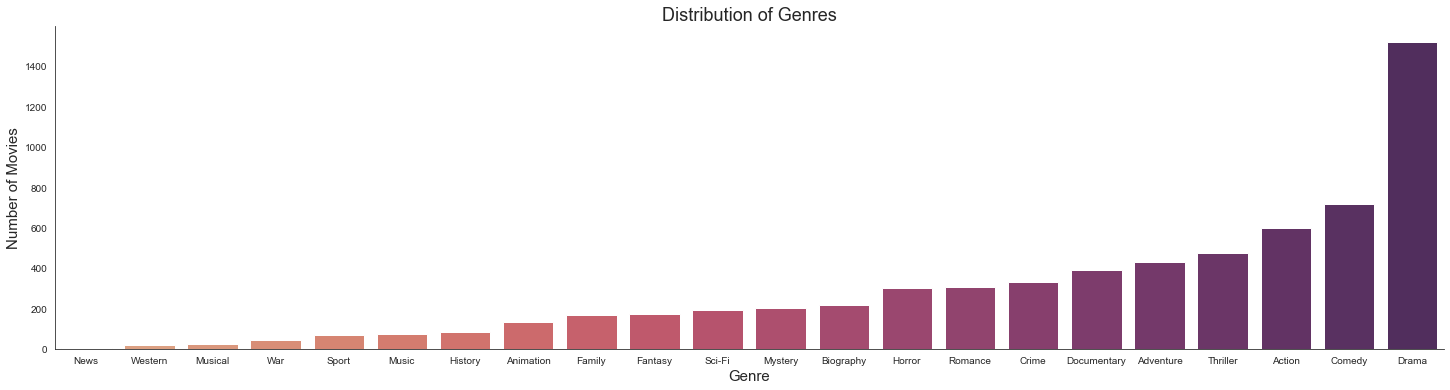

In [58]:
sns.catplot(x = 'genre', kind = 'count', palette = 'flare', 
            data = profitability_by_genre, aspect = 4, order = profitability_by_genre['genre'].value_counts(ascending=True).index)
plt.title('Distribution of Genres', fontsize = 18)
plt.ylabel('Number of Movies', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.show()

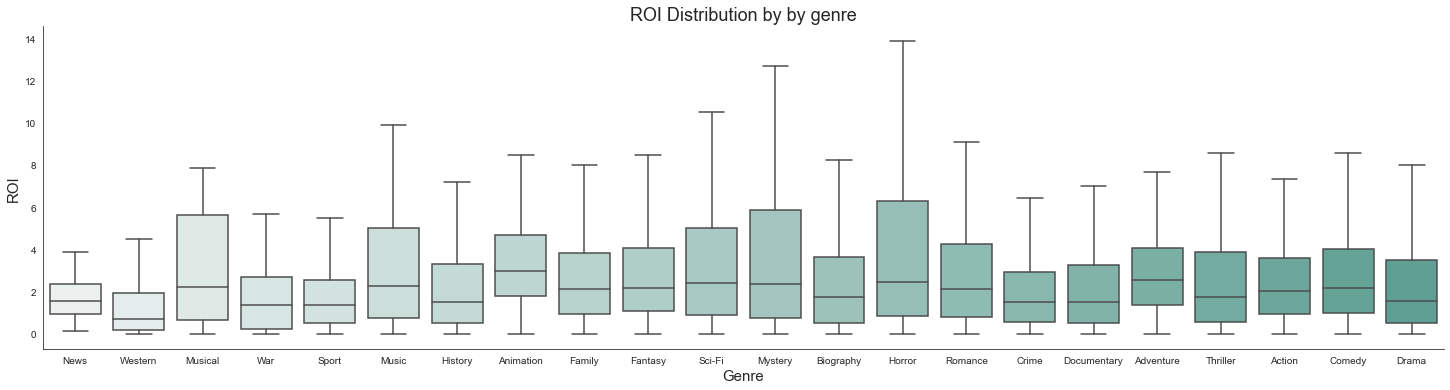

In [59]:
order = profitability_by_genre.sort_values('ROI').genre
sns.set_style("white")
sns.catplot(x = 'genre', y = 'ROI', kind = 'box', 
            palette="light:#5A9", data = profitability_by_genre, aspect = 4, showfliers = False,
            order = profitability_by_genre['genre'].value_counts(ascending=True).index)
plt.title('ROI Distribution by by genre', fontsize=18)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('ROI', fontsize=15)
plt.show()

Across all movies, **Drama** is the most common genre, **Reality-TV** the least common. What's interesting is that the most profitable genre **Animation** is rather at the low end of movie releases, being in 8th place.

### Analysis of Profitability by Runtime

Next I will examine the role runtime plays in the profitability of movies. For this analysis, I will merge our original (unstacked) *runtime_genre* DataFrame with the *budgets* DataFrame.

Again, I will first get rid of the *start_year* column and deal with missing values resulting from differently sized DataFrames.

In [60]:
runtime_genre.drop('start_year',axis=1,inplace=True)
runtime_genre.head()

,tconst,title,runtime_minutes,genres,runtime
0,tt0063540,Sunghursh,175.00,"Action,Crime,Drama",>150min
1,tt0066787,One Day Before the Rainy Season,114.00,"Biography,Drama",90min - 120min
2,tt0069049,The Other Side of the Wind,122.00,Drama,120min - 150min
3,tt0069204,Sabse Bada Sukh,90.00,"Comedy,Drama",90min - 120min
4,tt0100275,The Wandering Soap Opera,80.00,"Comedy,Drama,Fantasy",< 90min


In [61]:
profitability_by_runtime = runtime_genre.merge(budgets, how='left', on='title')
profitability_by_runtime.head()

,tconst,title,runtime_minutes,genres,runtime,release_date,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category
0,tt0063540,Sunghursh,175.00,"Action,Crime,Drama",>150min,NaN,nan,nan,nan,nan,nan,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,114.00,"Biography,Drama",90min - 120min,NaN,nan,nan,nan,nan,nan,NaN,NaN
2,tt0069049,The Other Side of the Wind,122.00,Drama,120min - 150min,NaN,nan,nan,nan,nan,nan,NaN,NaN
3,tt0069204,Sabse Bada Sukh,90.00,"Comedy,Drama",90min - 120min,NaN,nan,nan,nan,nan,nan,NaN,NaN
4,tt0100275,The Wandering Soap Opera,80.00,"Comedy,Drama,Fantasy",< 90min,NaN,nan,nan,nan,nan,nan,NaN,NaN


In [62]:
profitability_by_runtime = profitability_by_runtime.dropna()
display(profitability_by_runtime['ROI'].isna().value_counts())
profitability_by_runtime = profitability_by_runtime.astype({"release_year": int})
profitability_by_runtime.head()

False    3051
Name: ROI, dtype: int64

,tconst,title,runtime_minutes,genres,runtime,release_date,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category
31,tt0293429,Mortal Kombat,90.00,"Action,Adventure,Fantasy",90min - 120min,"Aug 18, 1995","20,000,000.00","70,433,227.00","122,133,227.00",1995,6.11,blockbuster,< 25m USD
42,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,"Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00",2013,0.37,box-office bomb,25-50m USD
48,tt0359950,The Secret Life of Walter Mitty,114.00,"Adventure,Comedy,Drama",90min - 120min,"Dec 25, 2013","91,000,000.00","58,236,838.00","187,861,183.00",2013,2.06,2.00x - 3.00x,50-100m USD
52,tt0365907,A Walk Among the Tombstones,114.00,"Action,Crime,Drama",90min - 120min,"Sep 19, 2014","28,000,000.00","26,017,685.00","62,108,587.00",2014,2.22,2.00x - 3.00x,25-50m USD
54,tt0369610,Jurassic World,124.00,"Action,Adventure,Sci-Fi",120min - 150min,"Jun 12, 2015","215,000,000.00","652,270,625.00","1,648,854,864.00",2015,7.67,blockbuster,> 200m USD


With the DataFrame merged and cleaned, I will progress in the same way I did for the genre profitability and create a grouping of ROI by runtime, thus allowing for categorization of runtime according to profitability.

In [63]:
profitability_by_runtime_gr = profitability_by_runtime.groupby('runtime').ROI.agg('median').reset_index().sort_values('ROI', ascending=False)
profitability_by_runtime_gr

,runtime,ROI
0,120min - 150min,2.41
1,90min - 120min,1.74
3,>150min,1.70
2,< 90min,1.56


In [64]:
runtime_percentage = profitability_by_runtime.runtime.value_counts(normalize=True)
runtime_percentage

90min - 120min    0.61
< 90min           0.25
120min - 150min   0.12
>150min           0.02
Name: runtime, dtype: float64

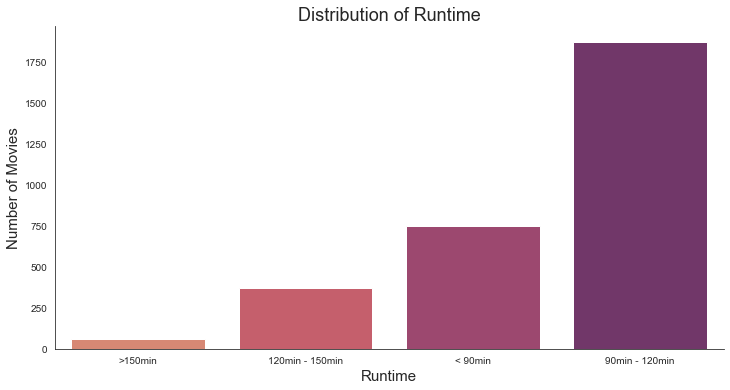

In [65]:
sns.catplot(x = 'runtime', kind = 'count', palette = 'flare', 
            data = profitability_by_runtime, aspect = 2, order = profitability_by_runtime['runtime'].value_counts(ascending=True).index)
plt.ylabel('Number of Movies', fontsize = 15)
plt.xlabel('Runtime', fontsize = 15)
plt.title('Distribution of Runtime', fontsize = 18)
plt.show()

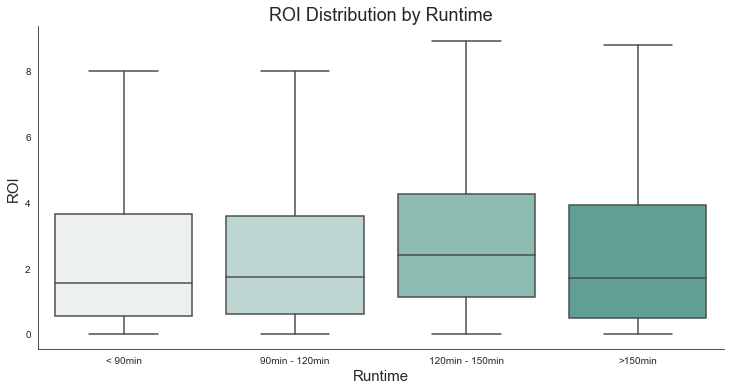

In [66]:
sns.set_style("white")
sns.catplot(x = 'runtime', y = 'ROI', kind = 'box', aspect = 2,
            palette="light:#5A9", data = profitability_by_runtime, showfliers = False,
            order=["< 90min","90min - 120min","120min - 150min",">150min"])
plt.title('ROI Distribution by Runtime', fontsize=18)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('ROI', fontsize=15)
plt.show()

While it is only the second largest group of releases, the **120 to 150 minute range appears to be the most profitable**, as evidenced by the highest median return on investment among all four runtime categories.

AS was the case for production budgets, the number of releases by itself are not a good indication for a movie's profitability.

### Analysis of Profitability by Release

To what extent the timing of a movie's release plays a role in its success will be analyzed in the following. For this purpose I will:

 1. Determine the most profitable release month(s)
 2. Determine the most profitable release day(s)

I begin by retrieving the month from the *release_date* column of our budgets DataFrame. This will result in an ordinal figure for each month, which I subsequently convert into the abbreviation of the proper month's name.

In [67]:
import calendar
budgets['release_month'] = pd.DatetimeIndex(budgets['release_date']).month
budgets['release_month'] = budgets['release_month'].apply(lambda x: calendar.month_abbr[x])
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category,release_month
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53,blockbuster,> 200m USD,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55,2.00x - 3.00x,> 200m USD,May
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43,box-office bomb,> 200m USD,Jun
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24,4.00x - 5.00x,> 200m USD,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15,4.00x - 5.00x,> 200m USD,Dec


Next I will do the same for the weekday, on which the movie was released.

In [68]:
budgets['release_day'] = pd.DatetimeIndex(budgets['release_date']).dayofweek
# This creates weekdays in the form of integers. I need to replace those with their actual names.
budgets['release_day'] = budgets['release_day'].replace([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])
budgets.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category,release_month,release_day
0,"Dec 18, 2009",Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",2009,6.53,blockbuster,> 200m USD,Dec,Friday
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2011,2.55,2.00x - 3.00x,> 200m USD,May,Friday
2,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",2019,0.43,box-office bomb,> 200m USD,Jun,Friday
3,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",2015,4.24,4.00x - 5.00x,> 200m USD,May,Friday
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",2017,4.15,4.00x - 5.00x,> 200m USD,Dec,Friday


Using **Searborn' boxplot** visualization, I will plot the ROI by weekday and month side-by-side.

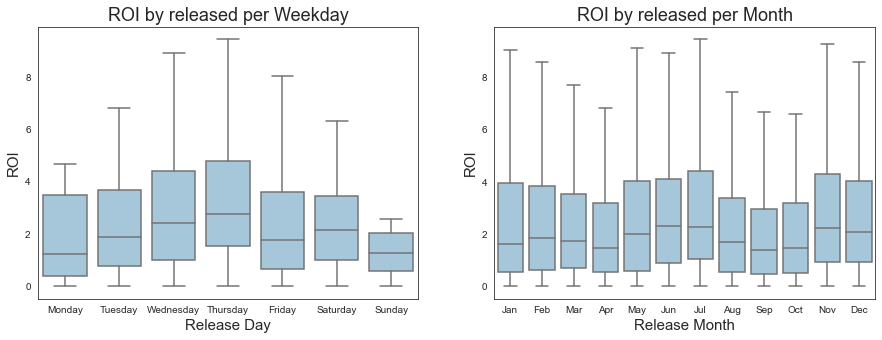

In [69]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))

sns.boxplot(x = 'release_day', y = 'ROI', color = '#9ecae1', data = budgets, showfliers=False,
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], ax = ax[0])
ax[0].set_xlabel('Release Day', fontsize=15)
ax[0].set_ylabel('ROI', fontsize=15)
ax[0].set_title('ROI by released per Weekday', fontsize=18)

sns.boxplot(x = 'release_month', y = 'ROI', color = '#9ecae1', data = budgets, showfliers=False,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = ax[1])
ax[1].set_xlabel('Release Month', fontsize=15)
ax[1].set_ylabel('ROI', fontsize=15)
ax[1].set_title('ROI by released per Month', fontsize=18)

plt.show()

From the above it becomes apparent that the **most profitable weekdays** for movie releases in the past have been **Wednesday and Thursday** (as can be seen by the highest median ROI in the boxplots), while the lease profitable days were Mondays and Sundays.

As far as months are concerned, both **June and July** have been the most profitable, April and September the least profitable.

While the results for weekday releases might not be as straightforward to explain, the release months' results might adhere to the fact that long summer nights might start or end with a good movie, just as winter months (November through February) just as easily call for spending time in a cozy movie theater.

### Analysis of Profitability by Rating

Ratings might be a questionable choice in order to determine the path to highest profitability, not necessarily because they are entirely susceptible to subjective taste, but moreover because not every movie-goer might actually rate a movie or even because some ratings might not be grounded in people having watched the movie in the first place.

Still, I will argue that ratings are subject interesting enough to merit further analysis.

The ratings DataFrame can be merged to our stacked genre_profitability DataFrame without changes.

In [70]:
genre_ratings = runtime_genre.merge(ratings, how='left', on='tconst')
genre_ratings.head()

,tconst,title,runtime_minutes,genres,runtime,averagerating,numvotes
0,tt0063540,Sunghursh,175.00,"Action,Crime,Drama",>150min,7.00,77.00
1,tt0066787,One Day Before the Rainy Season,114.00,"Biography,Drama",90min - 120min,7.20,43.00
2,tt0069049,The Other Side of the Wind,122.00,Drama,120min - 150min,6.90,"4,517.00"
3,tt0069204,Sabse Bada Sukh,90.00,"Comedy,Drama",90min - 120min,6.10,13.00
4,tt0100275,The Wandering Soap Opera,80.00,"Comedy,Drama,Fantasy",< 90min,6.50,119.00


In [71]:
genre_ratings_roi = genre_ratings.merge(budgets, how='left', on='title')
genre_ratings_roi.head()

,tconst,title,runtime_minutes,genres,runtime,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category,release_month,release_day
0,tt0063540,Sunghursh,175.00,"Action,Crime,Drama",>150min,7.00,77.00,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,114.00,"Biography,Drama",90min - 120min,7.20,43.00,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,122.00,Drama,120min - 150min,6.90,"4,517.00",NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,90.00,"Comedy,Drama",90min - 120min,6.10,13.00,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,80.00,"Comedy,Drama,Fantasy",< 90min,6.50,119.00,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN


In [72]:
genre_ratings_roi = genre_ratings_roi.dropna()
genre_ratings_roi.head()

,tconst,title,runtime_minutes,genres,runtime,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category,release_month,release_day
42,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday
48,tt0359950,The Secret Life of Walter Mitty,114.00,"Adventure,Comedy,Drama",90min - 120min,7.30,"275,300.00","Dec 25, 2013","91,000,000.00","58,236,838.00","187,861,183.00","2,013.00",2.06,2.00x - 3.00x,50-100m USD,Dec,Wednesday
52,tt0365907,A Walk Among the Tombstones,114.00,"Action,Crime,Drama",90min - 120min,6.50,"105,116.00","Sep 19, 2014","28,000,000.00","26,017,685.00","62,108,587.00","2,014.00",2.22,2.00x - 3.00x,25-50m USD,Sep,Friday
54,tt0369610,Jurassic World,124.00,"Action,Adventure,Sci-Fi",120min - 150min,7.00,"539,338.00","Jun 12, 2015","215,000,000.00","652,270,625.00","1,648,854,864.00","2,015.00",7.67,blockbuster,> 200m USD,Jun,Friday
56,tt0376136,The Rum Diary,119.00,"Comedy,Drama",90min - 120min,6.20,"94,787.00","Oct 28, 2011","45,000,000.00","13,109,815.00","21,544,732.00","2,011.00",0.48,box-office bomb,25-50m USD,Oct,Friday


The question is: Are ratings, i.e. viewers subjective opinion of movies, a good indicator for profitability to begin with? The **Pearson Correlation Coefficient** will tell us how much ratings and ROI move in the same direction.

In [73]:
correlation_ROI_rating = genre_ratings_roi['ROI'].corr(genre_ratings_roi['averagerating'])
correlation_ROI_rating

-0.01190439120875223

Negative 1.2% might indeed not be the most telling factor of movie profitability. Let's check out the correlations among the other columns:

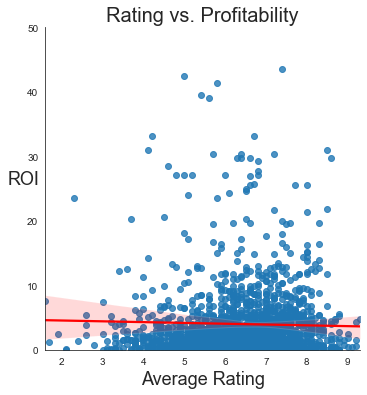

In [74]:
axes = sns.lmplot(x="averagerating", y="ROI", data=genre_ratings_roi, line_kws={'color': 'red'}).axes
plt.title('Rating vs. Profitability', fontsize=20)
plt.xlabel("Average Rating", fontsize=18)
plt.ylabel("ROI", fontsize=18, rotation=0)
axes[0,0].set_ylim(0,50)
sns.set_context('paper')

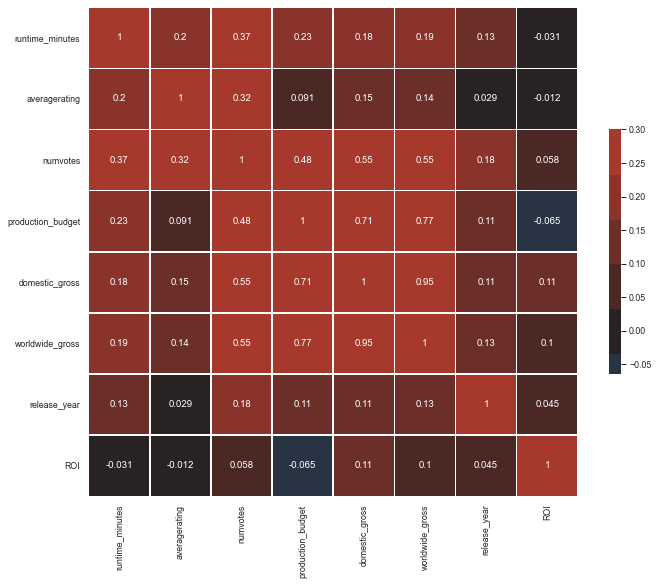

In [75]:
import numpy as np
# Compute the correlation matrix
corr = genre_ratings_roi.corr()

# Set up the matplotlib figure (since Seaborn operates upon matplotlib)
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Nevertheless, in case Microsoft first priority upon entering the original movies market might in fact **not** be profitability but rather satisfied customers (not an entirely unrealistic hypothesis, considering that [Microsoft never made a profit on its first Xbox console](https://www.vice.com/en/article/akgg7a/microsoft-says-its-never-made-money-selling-an-xbox-console), which types of **genres** receive the highest acclaim? 

In [76]:
rating_genres = genre_ratings_roi.set_index('averagerating').genres.str.split(',', expand=True).stack().reset_index('averagerating')
rating_genres.columns = ['averagerating', 'genre']
rating_genres.head()

,averagerating,genre
0,6.10,Adventure
1,6.10,Drama
2,6.10,Romance
0,7.30,Adventure
1,7.30,Comedy


In [77]:
genre_ratings_roi = genre_ratings_roi.merge(rating_genres, how='left', on='averagerating')
genre_ratings_roi.head()

,tconst,title,runtime_minutes,genres,runtime,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,ROI,ROI_category,budget_category,release_month,release_day,genre
0,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday,Adventure
1,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday,Drama
2,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday,Romance
3,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday,Comedy
4,tt0337692,On the Road,124.00,"Adventure,Drama,Romance",120min - 150min,6.10,"37,886.00","Mar 22, 2013","25,000,000.00","720,828.00","9,313,302.00","2,013.00",0.37,box-office bomb,25-50m USD,Mar,Friday,Romance


In [78]:
genre_ratings_roi_grouped = genre_ratings_roi.groupby('genre').averagerating.agg('median').reset_index().sort_values('averagerating', ascending=False)
genre_ratings_roi_grouped

,genre,averagerating
15,News,7.00
3,Biography,7.00
6,Documentary,7.00
10,History,6.80
18,Sport,6.80
2,Animation,6.70
21,Western,6.60
7,Drama,6.60
20,War,6.50
5,Crime,6.50


In [79]:
genre_ratings_roi_grouped_with_numvotes = genre_ratings_roi.groupby(['genre','numvotes']).averagerating.agg('median').reset_index().sort_values('averagerating', ascending=False)
display(genre_ratings_roi_grouped_with_numvotes)
genre_ratings_roi_grouped_with_numvotes.describe()

,genre,numvotes,averagerating
12506,Drama,"1,832.00",9.00
2203,Adventure,"1,832.00",9.00
26626,Sci-Fi,"1,832.00",9.00
371,Action,"1,832.00",9.00
10646,Documentary,69.00,8.80
...,...,...,...
17612,History,"3,878.00",2.10
29485,Thriller,647.00,2.10
17488,History,647.00,2.10
21379,Music,"74,978.00",1.60


,numvotes,averagerating
count,"32,791.00","32,791.00"
mean,"95,238.55",6.44
std,"142,469.39",0.84
min,5.00,1.60
25%,"5,058.00",5.90
50%,"43,256.00",6.50
75%,"118,779.00",7.00
max,"1,841,066.00",9.00


As assumed, the sheer range and very volatile vote participation do not provide a picture accurate enough as to really put emphasis on this analysis. This may however be a good starting point for future analyses...!

## Conclusion & Actionable Insights

### Production Budget

 - The **higher the production budget, the higher the profitability**
 - While the largest distribution of ROI considering the 75 percentile for production budgets appears in the category less than 25m USD, this budget category clearly has the lowest median profitability
     - A **budget of at least 100m USD** shows a significantly higher ROI than lower production budgets
     - Movies with a production budget **larger than 200m USD clearly stand apart from their peers** in terms of return on investment
     - Only 1% of all movies are backed with such a massive financial cushion

### Genre

 - The **most common genres** are **not necessarily the most profitable**
 - Drama, Action and Comedy are the most common genres, yet in terms of ROI they only rank in 16th, 12th and 8th place, respectively
     - **Animation, Adventure and Horror** movies have had the **greatest profitability** in the past and should be pursued as genres
     - Western, War and Sports movies have had the lowest return on investment and should be avoided in favor of greater financial success


### Runtime

 - With approx. 61%, the most frequently occurring runtime for movies is 90-120 minutes
 - **Profitability increases until around 120 to 150 minutes**, longer movies see a decline in their profitability
 - Only about 12% of movies range in the most profitable runtime class

### Release Timing

 - For *important* movies (e.g. large investments, planned sequels, etc.) aim for the summer months **June and July to generate the highest ROI**, while **avoiding April and September**
 - **Wednesday and Thursday** have shown to be **particularly profitable** weekdays, **Monday and Sunday are least favorable in terms of ROI**
 

### Rating

 - Relying on consumer ratings is not recommended when trying to create financially successful movies
     - **No objective measure** for a movie's financial success
     - **Negative correlation with ROI**
 - Ratings could still be taken into consideration when the aim is to follow certain trends or even taking chances to create cult classics (e.g. *The Shawshank Redemption*, *Fight Club* or *Donnie Darko* may all have been financially unrewarding yet are highly rated and critically acclaimed)